In [1]:
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Data Preprocessing
df = pd.read_csv('music_genre.csv').dropna()

# Check if any of the values in the dataset are NA; if not, this test throws an error
assert df.isna().sum().sum() == 0

# Drop any categorical/non-numeric/non-metadata columns from the dataset
df.drop(['tempo', 'key', 'obtained_date'], axis=1)

# Map each genre to a unique integer
genre_to_int = {
    'Electronic': 0,
    'Anime': 1,
    'Jazz': 2,
    'Alternative': 3,
    'Country': 4,
    'Rap': 5,
    'Blues': 6,
    'Rock': 7,
    'Classical': 8,
    'Hip-Hop': 9
}

# Map 'Major' and 'Minor' to [0, 1]
mode_to_int = {
    'Major': 0,
    'Minor': 1
}

# Replace the music_genre column so that they are all of type int
df['music_genre'] = df['music_genre'].map(genre_to_int)
df['mode'] = df['mode'].map(mode_to_int)

# Data Overview
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence,music_genre
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.358020,0.093586,0.456264,4.50000
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.479423,0.101373,0.247119,2.87231
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.000000,0.022300,0.000000,0.00000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.000000,0.036100,0.257000,2.00000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.000000,0.048900,0.448000,4.50000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,1.000000,0.098525,0.648000,7.00000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,1.000000,0.942000,0.992000,9.00000


/var/folders/lx/xr427z7d31q45cc__9ldxk2h0000gn/T/ipykernel_11675/1600732275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.copy().corr()


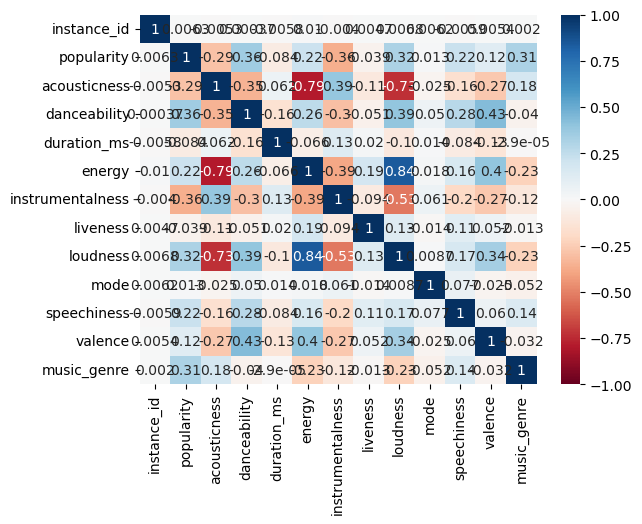

In [3]:
# Heatmap Analysis
data = df.copy().corr()
pcmp = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')


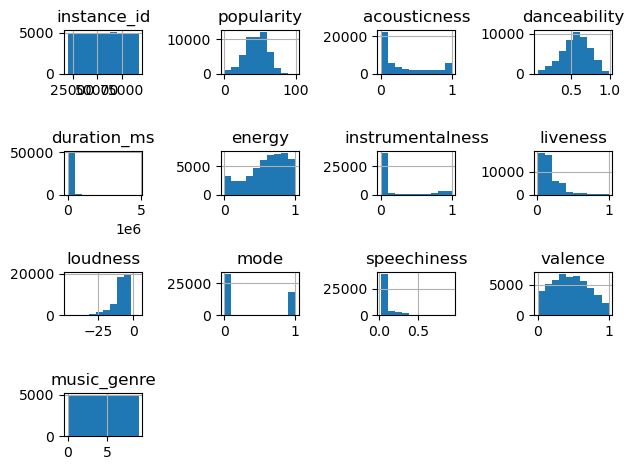

In [4]:
# Histograms for Each Attribute Pre-Standardized
df.hist()
plt.tight_layout()
plt.show()

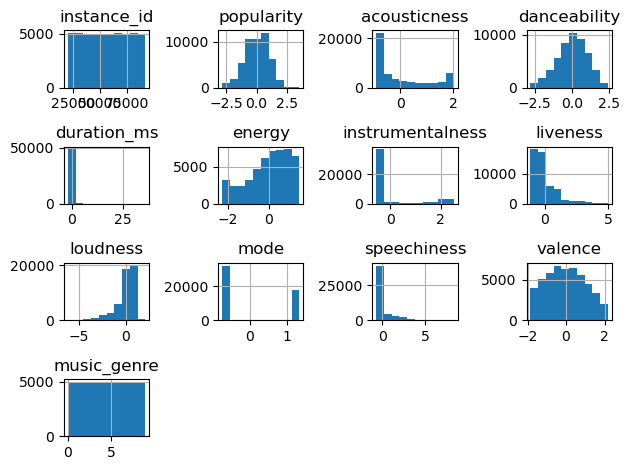

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,valence,music_genre
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.00000
mean,55888.396360,1.796252e-16,2.842171e-16,-1.250555e-16,-1.125500e-16,-7.958079e-18,-2.728484e-17,-1.014655e-16,-1.136868e-16,-2.273737e-17,-9.094947e-17,8.128609e-17,4.50000
std,20725.256253,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,2.87231
min,20002.000000,-2.845248e+00,-8.975970e-01,-2.791471e+00,-1.719534e+00,-2.264025e+00,-5.580745e-01,-1.139765e+00,-6.151660e+00,-7.467804e-01,-7.032154e-01,-1.846356e+00,0.00000
25%,37973.500000,-6.576063e-01,-8.390039e-01,-6.507353e-01,-3.610194e-01,-6.303180e-01,-5.580745e-01,-6.000939e-01,-2.801004e-01,-7.467804e-01,-5.670834e-01,-8.063593e-01,2.00000
50%,55913.500000,5.016004e-02,-4.757261e-01,5.463274e-02,-1.532286e-02,1.634630e-01,-5.575889e-01,-4.200591e-01,3.013602e-01,-7.467804e-01,-4.408160e-01,-3.344372e-02,4.50000
75%,73863.250000,7.579264e-01,7.195750e-01,7.208136e-01,3.680687e-01,8.136074e-01,-8.174618e-02,3.099788e-01,6.426752e-01,1.339082e+00,4.871678e-02,7.758919e-01,7.00000
max,91759.000000,3.524649e+00,2.020344e+00,2.394663e+00,3.582288e+01,1.509111e+00,2.502719e+00,4.987171e+00,2.089552e+00,1.339082e+00,8.369295e+00,2.167949e+00,9.00000


In [5]:
# Standardize Data for SVM

# Initialize a StandardScaler
scaler = StandardScaler()

# List of columns to exclude from standardization
exclude_columns = ['instance_id', 'music_genre']

# Standardize each column
for column in df.columns:
    if column in exclude_columns or df[column].dtype not in ['int64', 'float64']:
        continue
    # Check if the column is numeric and not already standardized
    if df[column].dtype in ['int64', 'float64'] and (df[column].mean() != 0 or df[column].std() != 1):
        df[column] = scaler.fit_transform(df[[column]])

# Write the preprocessed data to a CSV file
df.to_csv('preprocessed_data.csv', index=False)

# View histograms and data after standardizing
df.hist()
plt.tight_layout()
plt.show()

df.describe()
